In [2]:
import numpy as np
import math
import time import time
import scipy
from scipy.io import wavfile 
from scipy import signal
import matplotlib.pyplot as plt

[ 42.        +0.00000000e+00j -13.47286143+5.18739261e+00j
   1.        -6.35085296e+00j  -1.33333333-6.66666667e-01j
   0.        +0.00000000e+00j  -0.19380524+1.14594072e+00j
  -2.        -2.59052039e-16j  -0.19380524-1.14594072e+00j
   0.        +0.00000000e+00j  -1.33333333+6.66666667e-01j
   1.        +6.35085296e+00j -13.47286143-5.18739261e+00j]


/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


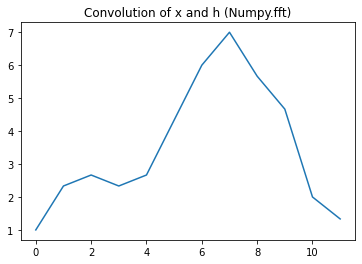

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


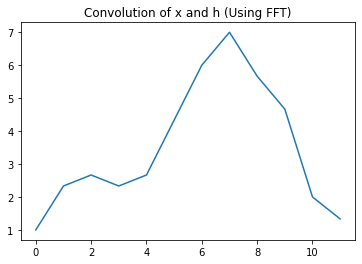

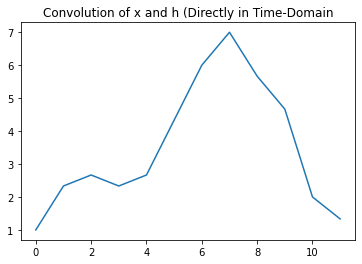

In [3]:
x = np.array([3,4,1,2,5,6,7,8,2,4])
h = np.array([1/3, 1/3, 1/3])
fft_size = x.size + h.size - 1
 
x_fft = np.fft.fft(x, fft_size)
h_fft = np.fft.fft(h, fft_size) 
conv_freq = np.multiply(x_fft,h_fft) 
result = np.fft.ifft(conv_freq)

print(conv_freq)


def conv(x, h):
    conv_size = x.size + h.size - 1
    y = np.zeros(conv_size)
    for i in range(h.size):
        for j in range(x.size):
            y[j + i] = y[j + i] + h.item(i) * x.item(j)
    
    return y

def fft_conv(x, h):
    fft_size = x.size + h.size - 1

    X = np.fft.fft(x, fft_size) # x in the frequency domain 
    H = np.fft.fft(h, fft_size) # h in the frequency domain 
    conv_freq = np.multiply(X,H) # convolving in frequency domain 
    result = np.fft.ifft(conv_freq) # returning to time domain
    return result

plt.plot(result)
plt.title("Convolution of x and h (Numpy.fft)")
plt.show()

plt.plot(fft_conv(x, h))
plt.title("Convolution of x and h (Using FFT)")
plt.show()

plt.plot(conv(x, h))
plt.title("Convolution of x and h (Directly in Time-Domain")
plt.show()

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


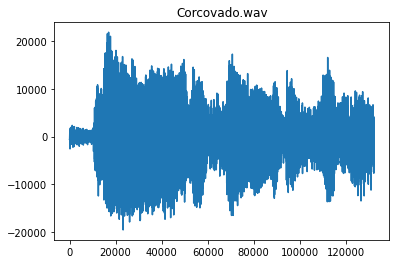

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


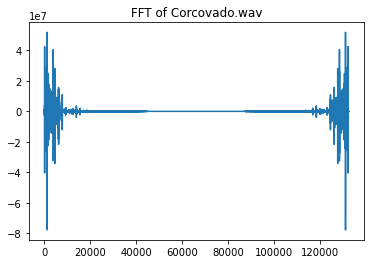

In [4]:
corcovado_rate, corcovado = wavfile.read('wav-files/Corcovado.wav')


corcovado_array = np.array([i[1] for i in corcovado]).astype(complex)
signal = corcovado_array[122*44100:125*44100]

plt.plot(signal)
plt.title('Corcovado.wav')
plt.show()


# fft 
corcovado_fft = np.fft.fft(signal)
plt.plot(corcovado_fft)
plt.title("FFT of Corcovado.wav")
plt.show()


/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


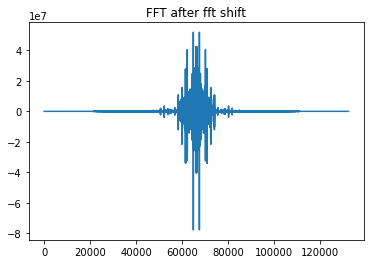

The DC component is the 0 Hz term. After a fft shift, the DC comonent is 483436.0


In [5]:
fft_shift = np.fft.fftshift(corcovado_fft)
plt.plot(fft_shift)
plt.title("FFT after fft shift")
plt.show()

print("The DC component is the 0 Hz term. After a fft shift, the DC comonent is " + str(np.absolute(corcovado_fft[0])))

In [12]:
index = np.argmax(np.abs(corcovado_fft))
freq = abs(index * 44100 / len(corcovado_fft))

print("Saxophone frequency =", freq)

Saxophone frequency = 439.3333333333333


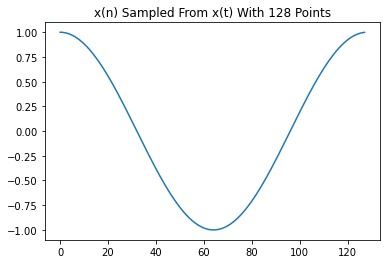

In [7]:
t = np.arange(0, 1, 1./128)
x_n = np.cos(2 * math.pi * t)
plt.plot(x_n)
plt.title('x(n) Sampled From x(t) With 128 Points')
plt.show()

In [8]:
def N_DFT(x_n, N):
    X_k = np.zeros(N, dtype=complex)
    
    for k in range(N):
        for n in range(N):
            c = np.exp(-1j * 2 * np.pi * k * n / N)
            X_k[k] += x_n[n] * c
    return X_k
    

In [9]:
def separate(x_n, N): 
    n = np.arange(0, N/2)
    x_1 = np.zeros(N/2)
    x_2 = np.zeros(N/2)
    for i in range(len(x_1)):
        x_1[i] = x_n[2 * i]
        x_2[i] = x_n[2 * i + 1]
    
    return x_1, x_2

In [13]:
def My_FFT(x_n, N):
    x_n = x_n.astype(complex)
    
    if (N < 2):
        return x_n
    
    else:
        x_1, x_2 = separate(x_n, N)
        x1_fft = My_FFT(x_1, N/2) 
        x2_fft = My_FFT(x_2, N/2)

        for k in range(N/2):
            W = np.exp(-1j * 2 * np.pi * k / N)
            temp = W * x2_fft[k]
            x_n[int(k)] = temp + x1_fft[k] 
            x_n[int(k + N/2)] = x1_fft[k] - temp

        return x_n